In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
cre =  pd.read_csv('credit_risk_dataset.csv')
cre.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
cre.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
cre.shape

(32581, 12)

In [6]:
miss_cre = cre.isnull().any(axis=1) 
print("Rows with missing values:")
print(miss_cre[miss_cre==True])

Rows with missing values:
39       True
50       True
57       True
59       True
62       True
         ... 
32547    True
32552    True
32553    True
32569    True
32570    True
Length: 3943, dtype: bool


In [7]:
dup = cre[cre.duplicated()]
print("Duplicate rows:")
print(dup)

Duplicate rows:
       person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_ra

In [8]:
cre.dropna(axis=0, inplace=True)

In [13]:
cre.drop_duplicates(inplace=True)

In [14]:
cre.shape

(28501, 12)

In [16]:
correlation_df = cre[["loan_percent_income","loan_status"]]

In [19]:
correlation = correlation_df["loan_percent_income"].corr(correlation_df['loan_status'])
print(f" Correlation Between Debt to Income RRatio and Default Rate: {correlation:.4f}")

 Correlation Between Debt to Income RRatio and Default Rate: 0.3800


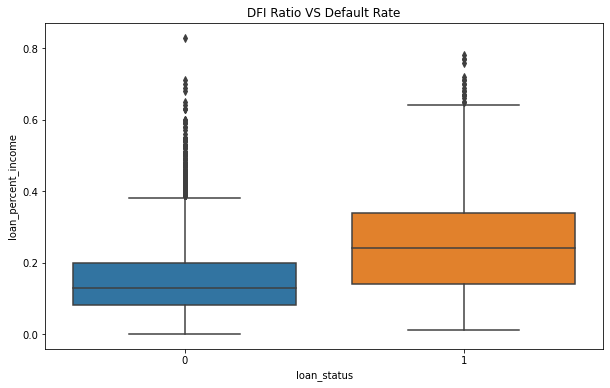

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(y='loan_percent_income', x='loan_status', data=cre)
plt.title('DFI Ratio VS Default Rate')
plt.show()

Ranking of Loan Intents by Default Count:
         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073
5            VENTURE            728         11304.910714

Ranking of Loan Intents by Average Loan Amount:
         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
5            VENTURE            728         11304.910714
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073


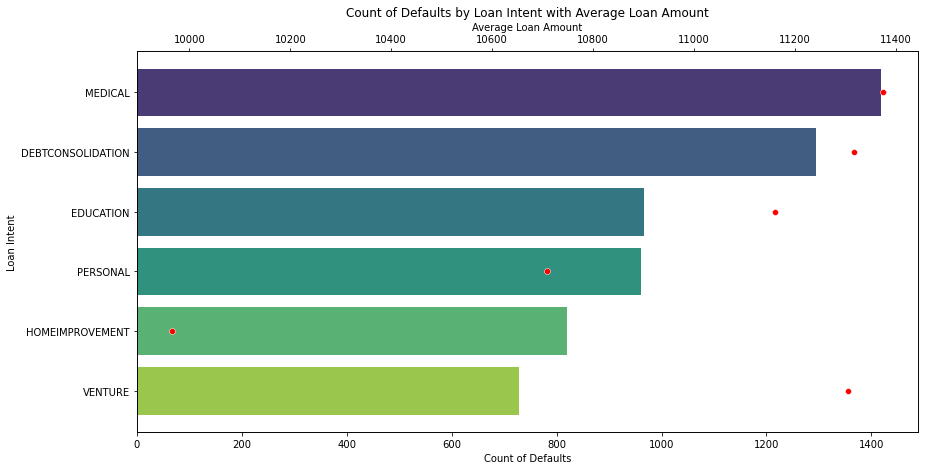

In [23]:
default_cases = cre[cre["loan_status"]==1]
loan_intent_default_count = default_cases.groupby("loan_intent")["loan_status"].count().reset_index()
loan_intent_default_count.columns = ["Loan Intent", "Default Count"]
loan_intent_avg_loan_amount = default_cases.groupby("loan_intent")["loan_amnt"].mean().reset_index()
loan_intent_avg_loan_amount.columns = ["Loan Intent", "Average Loan Amount"]
loan_intent_default_summary = pd.merge(loan_intent_default_count, loan_intent_avg_loan_amount, on="Loan Intent")
loan_intent_default_summary = loan_intent_default_summary.sort_values(by='Default Count', ascending=False)
defaultcount = loan_intent_default_summary.sort_values(by="Default Count", ascending=False)
print("Ranking of Loan Intents by Default Count:")
print(defaultcount)
avgloanamount = loan_intent_default_summary.sort_values(by="Average Loan Amount", ascending=False)
print("\nRanking of Loan Intents by Average Loan Amount:")
print(avgloanamount)
fig, ax1 = plt.subplots(figsize=(14,7))
sns.barplot(x="Default Count", y="Loan Intent", data=loan_intent_default_summary, palette="viridis", ax=ax1)
ax1.set_title("Count of Defaults by Loan Intent with Average Loan Amount")
ax1.set_xlabel("Count of Defaults")
ax1.set_ylabel("Loan Intent")
ax2 = ax1.twiny()
sns.scatterplot(x="Average Loan Amount", y="Loan Intent", data=loan_intent_default_summary, color="red", ax=ax2)
ax2.set_xlabel("Average Loan Amount")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split